# Audit Data Analysis

### Group 16 Project (Section 005)

## Introduction

### Background Information

Audit is the process of examining the financial records of any business to corroborate that their financial statements are in compliance with the standard accounting laws and principles. 
Auditors are responsible for locating fraudulent activity within businesses. Firms that commit fraud can cause greater issues within the economy and should be subject to legal action. Detecting fraud is done by auditing the financial statements of businesses, but this can be very difficult on a large scale. Data analysis can be used to consider a large scale of information and identify common fraudulent activities to make this work more effective. 

### Predictive Question
This study aims to predict whether a business will be fraudulant based on the given risk factors. In this data analysis, we will analyze two risk factors - Money Value and Total Discrepancy.

Risk factors: Money Value, Total Discrepancy

### Data Set
We will be using the Audit Data set. This data set contains predictors for identifying possible fraudulent firms from the Auditor Office of India and was collected between 2015 and 2016. The dataset builds a classification model to predict a fraudulent firm on the basis of present and historical risk factors.

`Audit Risk` - Audit risk is the product of measured values inherent risk(IR), control risk(CR), and detection risk(DR). 
1. `Inherent Risk Factors`(IR): the risk present due to the discrepancies present in the transactions. 

   *Risk Factors in IR*
    - `Para A value`: Discrepancy found in the planned-expenditure of inspection and summary report A in Rs (in crore).
    - `Para B value`: Discrepancy found in the unplanned-expenditure of inspection and summary report B in Rs (in crore).
    - `Total`: Total amount of discrepancy found in other reports Rs (in crore).
    - `Number`: Historical discrepancy score.
    - `Money value`: Amount of money involved in misstatements in the past audits.

2. `Control Risk Factors`(CR): the risk due to the discrepancies which are left undetected by an internal control system.
   
   *Risk Factors in CR*
    - `Sector score`: Historical risk score value of the target-unit using analytical procedure.
    - `Loss`: Amount of loss suffered by the firm last year.
    - `History`: Average historical loss suffered by firm in the last 10 years.
    - `District score`: Historical risk score of a district in the last 10 years.

3. `Detection Risk Factor` (DR): the risk of discrepancies present in the firm which are not even detected by the audit procedures. 

Relevant columns we will be using in the dataset:

- `Risk` - Risk Class assigned to an audit-case. 
- `Audit Risk` - Total risk score using analytical procedure
- `Money Value` - Amount of money involved in misstatements in the past audits.


## Methods

All the methods are described above each cell of the classification. 

The model is built using the following variables. 

Class Variable:

`Risk` - Calculated from the average of the audit risk and classified as high fraud class(1) or low fraud class(0). If the audit risk average was found to be 1, it is labelled No Fraud(0), otherwise it was labelled Fraud(1).


Predictor Variables:

`Money Value` - Amount of money involved in misstatements found in past audits.

`Total`: Total amount of discrepancy found in other reports Rs (in crore).




## Reference

Audit Data Data Set: https://archive.ics.uci.edu/ml/datasets/Audit+Data#

Fraudulent Firm Classification: A Case Study of an External Audit: https://www.tandfonline.com/doi/full/10.1080/08839514.2018.1451032

In [2]:
#Import packages
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

## Read and Load Data Set
This dataset is downloaded from Audit Data Data Set (https://archive.ics.uci.edu/ml/datasets/Audit+Data#)
and unzipped into a CSV.  

In [3]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00475/audit_data.zip" 
download.file(url, "audit_data.zip") 
unzip("audit_data.zip") 
audit <- read_csv("audit_data/audit_risk.csv") 
head("audit_risk.csv") 
audit

Warning message:
“Duplicated column names deduplicated: 'Score_B' => 'Score_B_1' [11]”
Parsed with column specification:
cols(
  .default = col_double(),
  LOCATION_ID = col_character()
)

See spec(...) for full column specifications.



[1] "audit_risk.csv"

Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,⋯,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5,⋯,0.4,0,0.2,0,2.4,8.574,0.4,0.5,1.7148,1
3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5,⋯,0.4,0,0.2,0,2.0,2.554,0.4,0.5,0.5108,0
3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5,⋯,0.4,0,0.2,0,2.0,1.548,0.4,0.5,0.3096,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55.57,14,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5,⋯,0.4,0,0.2,0,2,1.456,0.4,0.5,0.2912,0
55.57,18,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5,⋯,0.4,0,0.2,0,2,1.440,0.4,0.5,0.2880,0
55.57,15,0.00,0.2,0.000,0.00,0.2,0.000,0.00,5,⋯,0.4,0,0.2,0,2,1.464,0.4,0.5,0.2928,0


Table 1.

## Cleaning and Wrangling Data

We mutate to create a factor out of Risk Class column and preview the data frame with `glimpse`.             

In [6]:
# Mutate to create a factor out of Risk Class column              
audit_mutate <- audit %>%
  mutate(Risk = as_factor(Risk))

# Preview the data frame
glimpse(audit_mutate)  

# Show category in Risk Class column
audit_mutate %>%
  pull(Risk) %>%
  levels()

Rows: 776
Columns: 27
$ Sector_score   <dbl> 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, …
$ LOCATION_ID    <chr> "23", "6", "6", "6", "6", "6", "7", "8", "8", "8", "8"…
$ PARA_A         <dbl> 4.18, 0.00, 0.51, 0.00, 0.00, 0.00, 1.10, 8.50, 8.40, …
$ Score_A        <dbl> 0.6, 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.6, 0.6, 0.6, 0.6,…
$ Risk_A         <dbl> 2.508, 0.000, 0.102, 0.000, 0.000, 0.000, 0.440, 5.100…
$ PARA_B         <dbl> 2.50, 4.83, 0.23, 10.80, 0.08, 0.83, 7.41, 12.03, 11.0…
$ Score_B        <dbl> 0.2, 0.2, 0.2, 0.6, 0.2, 0.2, 0.4, 0.6, 0.6, 0.2, 0.6,…
$ Risk_B         <dbl> 0.500, 0.966, 0.046, 6.480, 0.016, 0.166, 2.964, 7.218…
$ TOTAL          <dbl> 6.68, 4.83, 0.74, 10.80, 0.08, 0.83, 8.51, 20.53, 19.4…
$ numbers        <dbl> 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.5, 5.5, 5.0, 5.0,…
$ Score_B_1      <dbl> 0.2, 0.2, 0.2, 0.6, 0.2, 0.2, 0.2, 0.4, 0.4, 0.2, 0.2,…
$ Risk_C         <dbl> 1.0, 1.0, 1.0, 3.6, 1.0, 1.0, 1.0, 2.2, 2.2, 1.0, 1.0,…
$ Money_Value    <dbl> 3.380, 

[1] "0" "1"

## Reasoning to choose Money Value and Total Discrepancy as predictors

We want to identify which risk factors has the most impact to determine the audit risk. 
In order to find the average risk of three major risk factors, we use select to pull out the columns we want, group them by `Risk` class and use `summarize` to calculate their mean. 

In [7]:
# Average risk
mean_risk <- select(audit_mutate, Inherent_Risk:Risk) %>%
            group_by(Risk) %>%
            summarize(mean_inherent_risk = mean(Inherent_Risk), 
                   mean_control_risk = mean(CONTROL_RISK), 
                   mean_detection_risk = mean(Detection_Risk))

mean_risk

`summarise()` ungrouping output (override with `.groups` argument)



Risk,mean_inherent_risk,mean_control_risk,mean_detection_risk
<fct>,<dbl>,<dbl>,<dbl>
0,1.964002,0.4237792,0.5
1,41.951181,0.8026230,0.5


Table 2.

There is a large difference in inherent risk between fraud and non-fraud, we want to further investigate which risk factor in inherent risk more likely leads to fraud. In inherent risk, we choose money_value as a predictor  to evaluate if a business has higher amount of money involved in mistatement leads to fraud.

We will be using the Risk Class column for our Class variable and the Money Value and Total Discrepancy as our predictors. 

Money value is a good predictor as it shows the amount of money involved in misstatements from the past for a particular business which is relevent to the level of risk of that business comitting fraud again.

Total discprepancy reflects the amount of misstatements in the audit report, which indicates the reliability of the financial statements of a business. A business with less reliable financial records tends to be fraudulent. 

## Create Test and Training Set

We use the `initial_split` to create training and testing datasets.
The training dataset will be used to build our classification model and the testing dataset will be used for prediction.

In [9]:
# Select relevant columns  
audit_data <- select(audit_mutate, TOTAL, Money_Value, Audit_Risk, Risk)

#Set seed for Randomness
set.seed(1)
audit_split <- initial_split(audit_data, prop = 0.75, strata = Risk)
audit_train <- training(audit_split)
audit_test <- testing(audit_split) 

audit_train

TOTAL,Money_Value,Audit_Risk,Risk
<dbl>,<dbl>,<dbl>,<fct>
4.83,0.94,0.5108,0
0.74,0.00,0.3096,0
10.80,11.75,3.5060,1
⋮,⋮,⋮,⋮
0.84,0.00,0.3136,0
0.20,0.00,0.2880,0
0.00,0.32,0.2928,0


Table 3.

## Exploratory Data Analysis

In order to find the percent of fraudulent and non-fraudulent firms in the training data, we group the training data by Risk class, use `summarize` and `mutate` to find the percentage and create a table.  

We visualize the distribution of fraudulent and non-fraudulent firms using `ggplot` to create scatter plot and color them by Risk class. 

In [19]:
# Table showing the percent of fraudulent and non-fraudulent firms in the training data                     
audit_table <- audit_train %>%
                      group_by(Risk) %>%
                      summarize(n = n()) %>%
                      mutate(percent = 100*n/nrow(audit_train))
audit_table

`summarise()` ungrouping output (override with `.groups` argument)



Risk,n,percent
<fct>,<int>,<dbl>
0,354,60.72041
1,229,39.27959


Table 4.

Warning message:
“Removed 89 rows containing missing values (geom_point).”


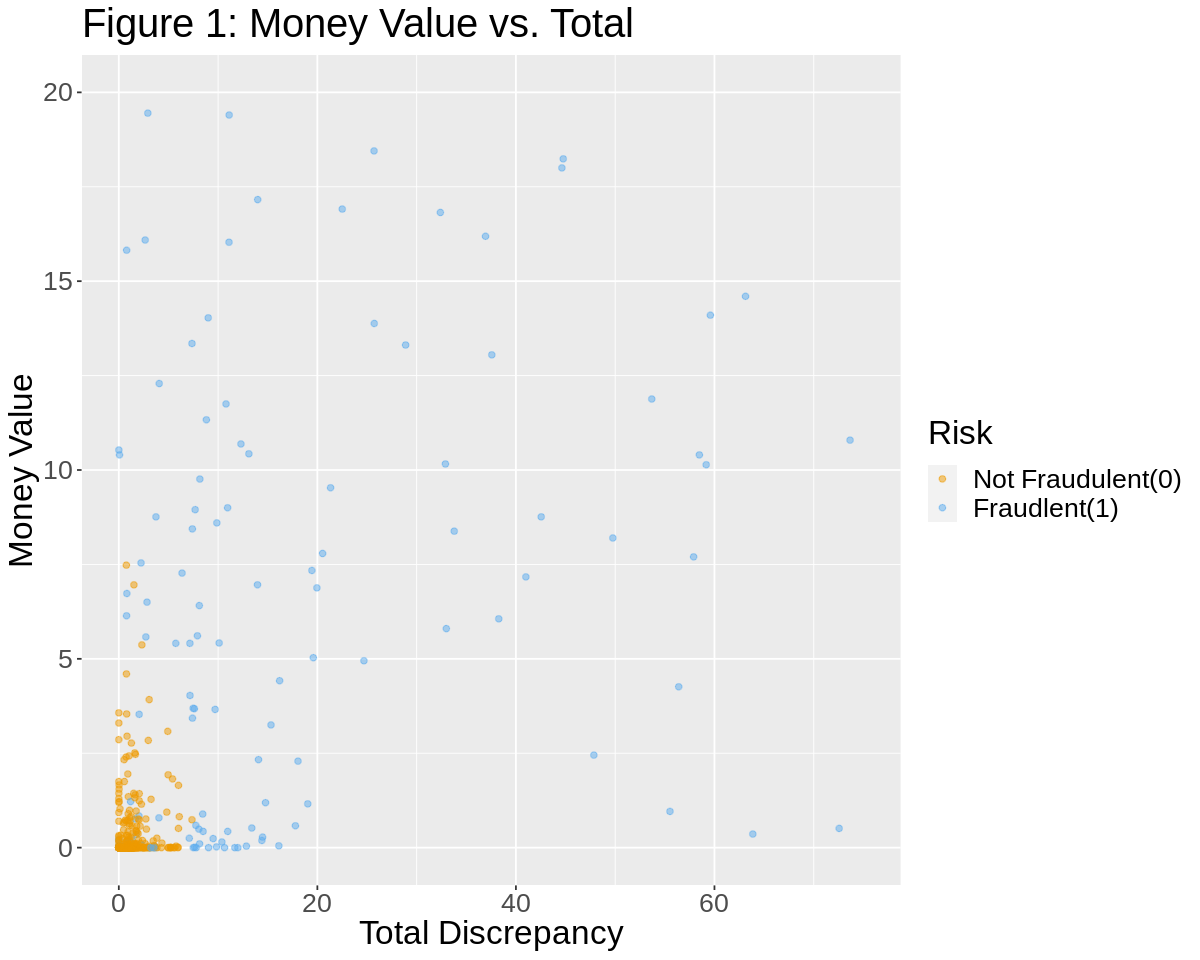

In [20]:
# Create Visualization showing the distribution of fraudulent vs. non-fraudulent firms

options(repr.plot.width = 10, repr.plot.height = 8)

audit_plot <- audit_train %>%
            ggplot(aes(x = TOTAL, y = Money_Value, color = Risk)) +
            geom_point(alpha = 0.5) +
            labs(x = "Total Discrepancy", y = "Money Value", color = "Risk") +
            scale_color_manual(labels = c("Not Fraudulent(0)", "Fraudlent(1)"), 
                               values = c("orange2", "steelblue2")) + 
            ggtitle("Figure 1: Money Value vs. Total") +
            xlim(0, 75) +
            ylim(0, 20) +
            theme(text = element_text(size = 20))
           
audit_plot

## Classification with KNN

We use K-nearest neighbors to create a classification model to determine whether a firm is fraudulent or non-fradulent.

### Finding the best K value

We create a recipe with our standardized training data and scaled predictors. 
Then we tune the k-nearest neighbors specification and perform the cross-validation with 5 folders. 
The recipe and model specification are added to `workflow` to fit the data and summarize the metrics. Finally we use `filter` to pull out the accuracy column. 

In [11]:
set.seed(1000)

#Create standardization recipe
audit_recipe <- recipe(Risk ~ Money_Value + TOTAL, data = audit_train) %>%
                step_scale(all_predictors()) %>%
                step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
            set_engine("kknn") %>%
            set_mode("classification")

#Cross-validation
k_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 2))

knn_vfold <- vfold_cv(audit_train, v = 5, strata = Risk)

#Fit KNN model
knn_fit <- workflow() %>%
        add_recipe(audit_recipe) %>%
        add_model(knn_spec) %>%
        tune_grid(resamples = knn_vfold, grid = k_vals) %>%
        collect_metrics()

#Filter out the accuracy column
accuracies <- knn_fit %>%
        filter(.metric == "accuracy")

accuracies


x Fold1: model 1/1 (predictions): Error: Problem with `mutate()` input `.row`.
[...



neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.8561687,4,0.009101028,Model01
3,accuracy,binary,0.8905797,4,0.009385385,Model02
5,accuracy,binary,0.9078224,4,0.013055608,Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
15,accuracy,binary,0.9120959,4,0.01398736,Model08
17,accuracy,binary,0.9120959,4,0.01398736,Model09
19,accuracy,binary,0.9099591,4,0.01402657,Model10


Table 5.

In order to find the best k value, we plot the number of neighbours and accuracy. 

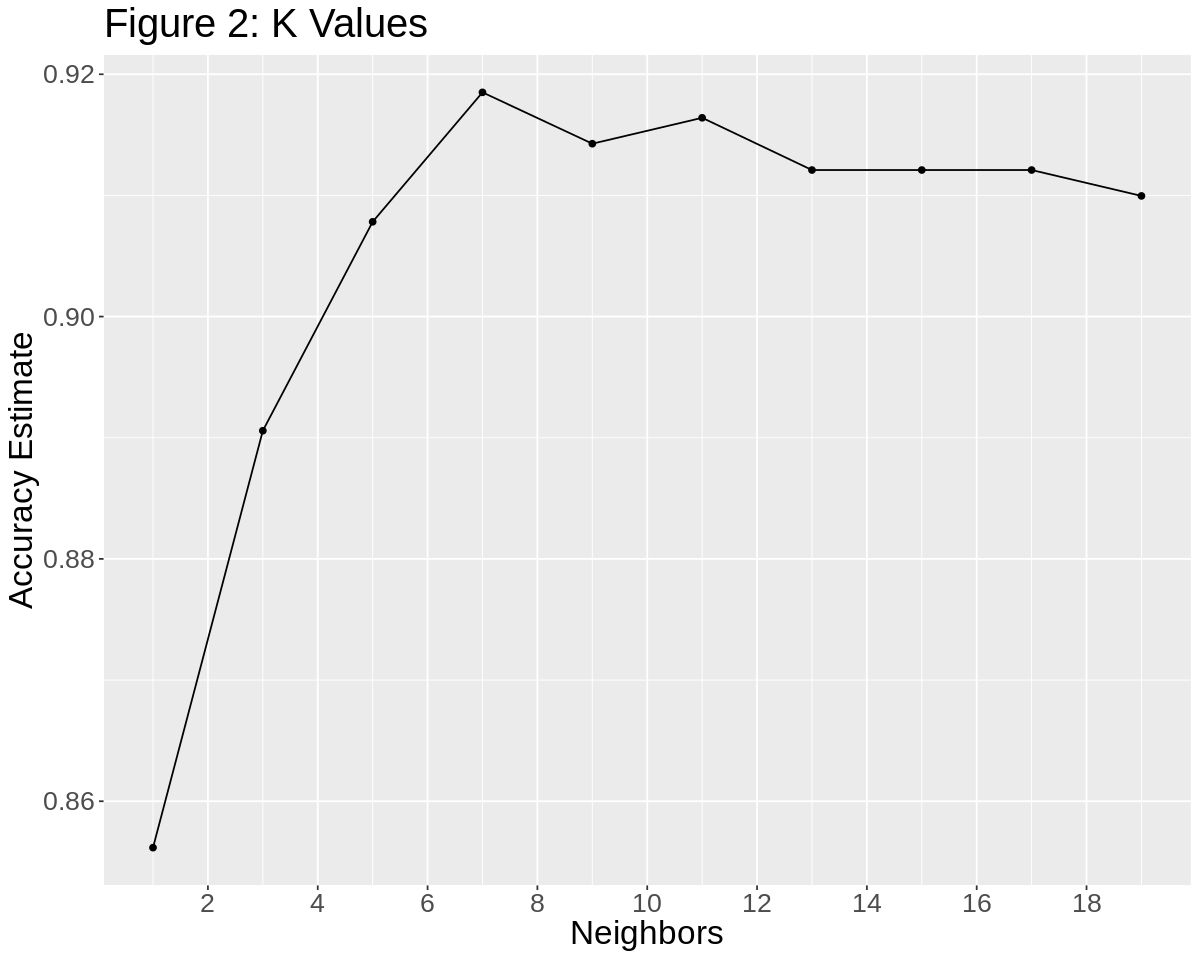

In [12]:
#Visualizing the k values
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
geom_point() +
geom_line() +
labs(x = "Neighbors", y = "Accuracy Estimate") +
ggtitle("Figure 2: K Values") + 
scale_x_continuous(breaks = seq(0, 20, 2)) +
theme(text = element_text(size = 20))

accuracy_vs_k

From the plot, we determine the best k value to be 7 as it provides the highest accuracy. 

## Build the Classification Model

We use the determined k value to create a classification model with the training data.

In [14]:
#Create standardization recipe
set.seed(1000)
audit_recipe <- recipe(Risk ~ Money_Value, data = audit_train) %>%
                step_scale(all_predictors()) %>%
                step_center(all_predictors())

#Choose k = 7
audit_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 7) %>%
            set_engine("kknn") %>%
            set_mode("classification")

#Fit KNN model
audit_fit <- workflow() %>%
        add_recipe(audit_recipe) %>%
        add_model(audit_spec) %>%
        fit(audit_train)

## Prediction  with the Test Dataset

We created the prediction with the testing dataset and calculated the accuracy with `metrics`.

In [21]:
#Predict on the test dataset
audit_predictions <- predict(audit_fit, audit_test) %>%
        bind_cols(audit_test)
    
#Prediction accuracy
audit_metrics <- audit_predictions %>%
        metrics(truth = Risk, estimate = .pred_class) %>%
        filter(.metric == "accuracy")
audit_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8704663


Table 6.

Our model shows a 87% accuracy.

## Visualization of Prediction


We created a dataset of prediction using our testing dataset and visualize it with `ggplot` scatter plot. 

In [16]:
audit_predictions <- predict(audit_fit, audit_test) %>%
        bind_cols(audit_test)
audit_predictions

.pred_class,TOTAL,Money_Value,Audit_Risk,Risk
<fct>,<dbl>,<dbl>,<dbl>,<fct>
1,6.68,3.38,1.7148,1
1,28.10,205.19,56.7096,1
1,63.70,11.16,9.2632,1
⋮,⋮,⋮,⋮,⋮
0,3.30,0,0.6760,0
0,0.89,0,0.3156,0
0,0.28,0,0.2912,0


Table 7.

Warning message:
“Removed 29 rows containing missing values (geom_point).”


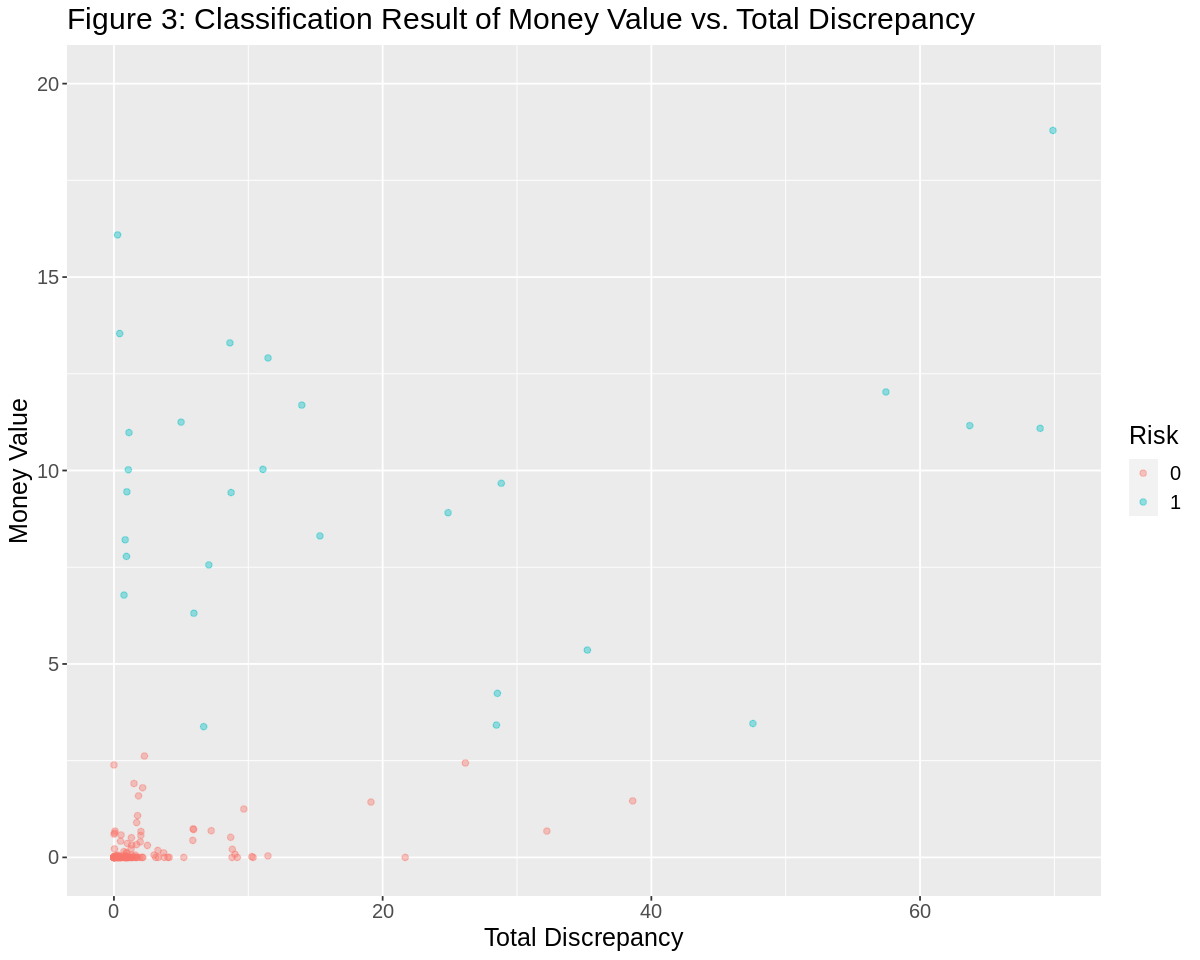

In [56]:
options(repr.plot.width = 10, repr.plot.height = 8)
audit_result_plot <- ggplot(audit_predictions, aes(x = TOTAL, y = Money_Value, color=.pred_class)) +
            geom_point(alpha = 0.4) +
            xlab("Total Discrepancy") +
            ylab("Money Value") + 
            labs(color = "Risk") +
            xlim(0, 70) +
            ylim(0, 20) +
            ggtitle("Figure 3: Classification Result of Money Value vs. Total Discrepancy") +
            theme(text = element_text(size = 15))
audit_result_plot

From the plot, we found non-fradulent firms tend to have lower total discrepancy and low money value. 

We test our model with a value from the visualization to see if the model classifies the new observation accurately.

In [23]:
# Prediction for new observation
new_obs <- tibble(Money_Value = 10, TOTAL = 10)
class_prediction <- predict(audit_fit, new_obs)

class_prediction

.pred_class
<fct>
1


Table 8.

## Discussion

### Summary
We found that a business with low money value involved in mistatement and low total discrepancy tends to be less fraudulent according to our classification model.

Our model has a accuracy of 87% with two risk factors, which proves that our predictors have large influence on the audit risk of a business. 

Most of the non-fraudulent firms have a money value between 0 to 2.5 and a total discrepancy between 0 to 12.


This is what we expected to find as a business with low money value involved in mistatement and low total discrepancy has lower risk of being fraudulent. 

This can have a impact on the efficiency of auditors in locating and determining businesses that are likely to commit fraud. 

### Further questions to ask:
This information could then lead to possible questions about particular districts or sectors with very high likeliness of fraud in order to focus in on those areas. 

- Average risk of each location.
- Determine which location has the highest risk of fraud.
- Which factors contribute the most to the risk of fraud?